# Python 與機器學習（7）

## 郭耀仁

## 分類問題

- 我們的感知器學習與羅吉斯迴歸用來處理線性可分的資料表現得很不錯
- 但什麼樣的資料這些分類器會分得很差？

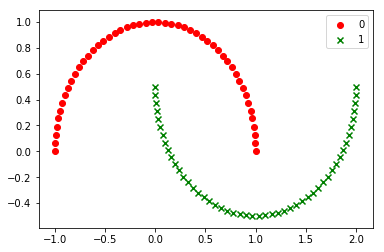

In [1]:
# 像是這樣子的資料：
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

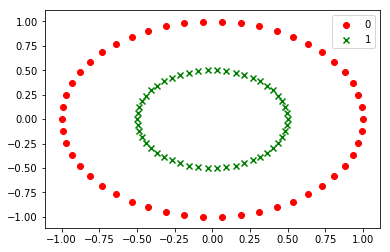

In [2]:
# 或是像這樣子的資料：
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 100, random_state = 0, factor = 0.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

## 分類問題（2）

- 面對線性不可分的資料，我們可以採取：
    - 支持向量機（Support Vector Machine，SVM）
    - 決策樹（Decision Tree）
    - K 最近鄰（K-nearest neighbor，KNN）

## 支持向量機

- 將資料投射到可以用一個超平面（Hyper-plane）分離的空間中：

$$\phi(x_1, x_2) = z$$

$$z = x_1^{2} + x_2^{2}$$

![SVM](https://storage.googleapis.com/py_ml_images/svm.png)

In [3]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', 's') # 有三個類別
    colors = ('red', 'green', 'blue') # 有三個類別
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, 2:] # 花瓣長度與花瓣寬度
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2) # gamma = 0.2, 核函數 rbf
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

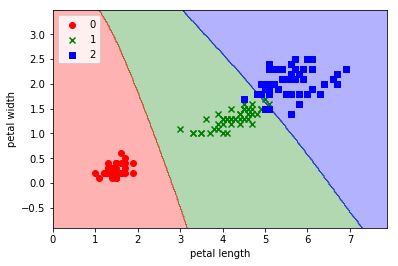

In [5]:
plot_decision_boundary(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


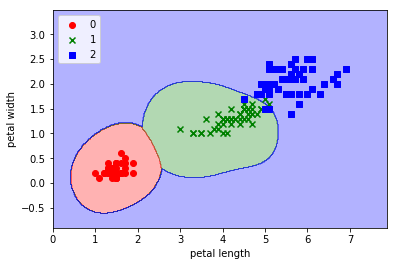

In [7]:
# 調整 gamma
svm = SVC(kernel = 'rbf', gamma = 2) # gamma = 2
svm.fit(X_train, y_train)

plot_decision_boundary(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


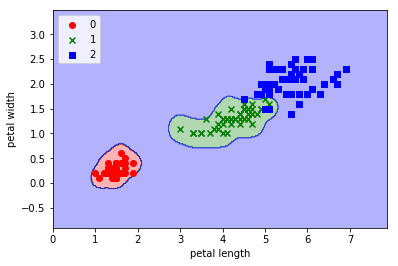

In [9]:
# 調整 gamma
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 20) # gamma = 20
svm.fit(X_train, y_train)

plot_decision_boundary(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

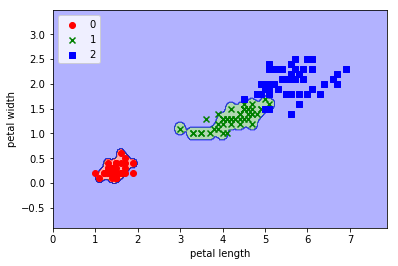

In [10]:
# 調整 gamma
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 100) # gamma = 100
svm.fit(X_train, y_train)

plot_decision_boundary(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


## 支持向量機（2）

- 調高 `gamma` 參數的過程，其實就是一個對訓練資料配適（fitting）的過程
- 過高的 `gamma` 參數可以讓訓練資料完美的分類，但對測試資料的預測反而下滑

## 決策樹

- 好解釋的分類器
- 用不同的門檻值切分變數
- 以**最大化**資訊增益值為目標

$$IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

## 決策樹（2）

- 資訊值有三種計算方式：
    - 錯誤率（Error）
    - 吉尼指標（Gini Index）
    - 熵（Entropy）（\*）

## 決策樹（3）

- 這三個計算方式都跟**錯誤率（Error）**計算有關
- [混淆矩陣（Confusion Matrix）](https://en.wikipedia.org/wiki/Confusion_matrix)

|   |陽性|陰性|
|---|---|----|
|陽性|5|8|
|陰性|6|7|

- $\text{準確率（Accuracy）}= \frac{5 + 7}{5 + 6 + 7 + 8} = 0.52$
- $\text{錯誤率（Error）} = 1 - \text{Accuracy} = 1 - 0.5 = 0.48$

## 決策樹（4）

|計算方式|資訊值公式|
|-------|--------|
|錯誤率|$1 - \text{accuracy}$|
|吉尼指標|$1 - \text{accuracy}^2 - \text{error}^2$|
|熵|$-(\text{accuracy}\log_2(\text{accuracy}) + \text{error}\log_2(\text{error}))$|

## 決策樹（5）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

## 決策樹（6）

- 先計算各個節點的資訊值
- A 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$10/40 = 0.25$|$10/40 = 0.25$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-0.75^2-0.25^2 = 0.375$|$1-0.75^2-0.25^2 = 0.375$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|

## 決策樹（7）

- 先計算各個節點的資訊值
- B 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$20/60 = 1/3$|$0/20 = 0$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-(2/3)^2-(1/3)^2 = 1/3$|$1-1^2-0^2 = 0$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(2/3log_2(2/3)+(1/3)log_2(1/3)) = 0.92$|$-(1log_2(1)+0log_2(0)) = 0$|

## 決策樹（8）

- 最後計算**資訊增益值**：

|計算方式|情況 A|情況 B|
|-------|-----|------|
|錯誤率|$0.5-\frac{40}{80}\times0.25-\frac{40}{80}\times0.25 = 0.25$|$0.5-\frac{6}{8}\times\frac{1}{3}-0=0.25$|
|吉尼指標|$0.5-\frac{4}{8}\times0.375-\frac{4}{8}\times0.375=0.125$|$1-\frac{6}{8}\times0.\bar{4}-0=0.1\bar{6}$|
|熵|$0.5-\frac{4}{8}\times0.81-\frac{4}{8}\times0.81=0.125$|$1-\frac{6}{8}\times0.92-0=0.31$|

- 實務使用熵（Entropy）居多

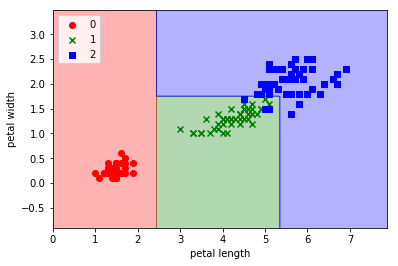

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
tree.fit(X_train, y_train)
plot_decision_boundary(X = X, y = y, classifier = tree)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


## 決策樹（9）

- 假如想要畫出分支圖，需要另外安裝[GraphViz](http://www.graphviz.org/)

![GraphViz Decision Tree](https://storage.googleapis.com/py_ml_images/tree_graphviz.png)

## K 最近鄰

![knn](https://storage.googleapis.com/py_ml_images/knn.png)

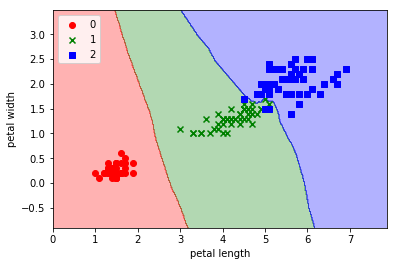

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
plot_decision_boundary(X = X, y = y, classifier = knn) # 換分類器
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93
